In [10]:
pip install git+https://github.com/LucianoPereiraValenzuela/ECC_2025_testing.git


  Cloning https://github.com/LucianoPereiraValenzuela/ECC_2025_testing.git to c:\users\lucia\appdata\local\temp\pip-req-build-9niushr5
  Resolved https://github.com/LucianoPereiraValenzuela/ECC_2025_testing.git to commit 7a56353dedfaffc28ba74b00468db6e41ac422b5
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'


  Running command git clone --filter=blob:none --quiet https://github.com/LucianoPereiraValenzuela/ECC_2025_testing.git 'C:\Users\lucia\AppData\Local\Temp\pip-req-build-9niushr5'


In [11]:
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister
from scipy.linalg import expm
from qiskit.circuit import Parameter
from qiskit.quantum_info import SparsePauliOp, Operator, process_fidelity
from testing import test_4

La formula de Trotter permite aproximar la evolución de un Hamiltoniano,
$$H = \sum_j H_j $$
mediante un producto de evoluciones rápidas,
$$ U(t) \approx \left(  \prod_j e^{-it H_j/m} \right)^m.$$
La calidad de esta aproximación depende del número de pasos $m$. La formula de Trotter tiene aplicaciones en simulación de materiales, hasta resolución de ecuaciones diferenciales. Para estas aplicaciones es fundamental tener una solución de buena calidad, lo cual puede lograrse aumentando el valor de $m$. Sin embargo, existen otras estrategías que pueden mejorar la calidad sin aumentar los pasos de Trotter. La clave es darse cuenta distintas permutaciones de los operadores $H_j$ dan distintas aproximaciones. Consideremos el siguiente ejemplo
$$ H = X + Y + Z ,$$
donde $\{X,Y,Z\}$ son matrices de Pauli. Las dos siguientes transformaciones son approximaciones válidad de $U=e^{-itH}$ (con $m=1$),
$$ U_1 = e^{-itX}e^{-itY}e^{-itZ},\qquad U_2 = e^{-itZ}e^{-itY}e^{-itX}. $$
Sin embargo, estas aproximaciones no tienen la misma calidad.

In [12]:
H = SparsePauliOp.from_list( [('X',1),('Y',1),('Z',1)] )
def U(t):
    return expm( -1j*H.to_matrix()*t )

t = Parameter('t')
m = 1 

In [13]:
qc = QuantumCircuit(1)
for _ in range(m):
    qc.rx( 2*t/m, 0 )
    qc.ry( 2*t/m, 0 )
    qc.rz( 2*t/m, 0 )

U_1 = Operator( qc.assign_parameters([0.2]) )
process_fidelity( U_1, target=Operator(U(0.2)) )

0.9949598835996103

In [14]:
qc = QuantumCircuit(1)
for _ in range(m):
    qc.rz( 2*t/m, 0 )
    qc.ry( 2*t/m, 0 )
    qc.rx( 2*t/m, 0 )

U_2 = Operator( qc.assign_parameters([0.2]) )
process_fidelity( U_2, target=Operator(U(0.2)) )

0.9957866040417919

Podemos ver que $U_1$ tiene una fidelidad del $99.49\%$ y $U_2$ del $99.57\%$, es decir $U_2$ es mejor! Hacer una buena elección en el orden del producto es crucial para alcanzar una buena aproximación en un número alto de qubits. 

Consideremos ahora el modelo de Heisenberg, descrito por el siguiente Hamiltoniano
$$H = \sum_{j=0}^{N-2} \left( X_jX_{j+1} + Y_{j}Y_{j+1} + Z_jZ_{j+1} \right) + h\sum_{j=0}^{N-1}Z_j. $$ 
Este describe la interacción magnética de una cadena de $N$ spíns en presencia de un campo magnético externo $h$. Por simplicidad consideraremos $h=0$.

![](https://github.com/LucianoPereiraValenzuela/ECC_2025_testing/blob/main/img/ECC_heisenberg.png?raw=true)

__Desafío:__ Aproxime mediante la formula de Trotter la evolución del modelo de Heisenberg para $N=5$ qubits. Para esto complete la siguiente celda con la implementación de una capa de trotter en ```Trot_tb_qc```. Su solución debe tener una fidelidad superior al $90\%$ con $m=5$ pasos de trotter. 

(hacer figura de spins)

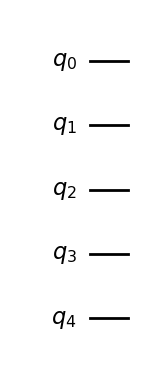

In [15]:
num_qubits = 5

# Definimos el parámetro t
t = Parameter('t')
Trot_tb_qr = QuantumRegister(num_qubits, 'q')
Trot_tb_qc = QuantumCircuit(Trot_tb_qr, name='Trot')

### Escriba su solución acá ###

################################

Trot_tb_gate = Trot_tb_qc.to_instruction()

Trot_tb_qc.draw('mpl')

In [16]:
def U_trotterize(delta_t, trotter_steps):
    qr = QuantumRegister(num_qubits)
    qc = QuantumCircuit(qr)

    for step in range(trotter_steps):
        qc.append( Trot_tb_gate, list(range(num_qubits)) )

    if qc.num_parameters > 0 :    
        qc = qc.assign_parameters({t: delta_t })
    
    return qc

In [17]:
test_4( U_trotterize )

Fidelidad= 0.1154931716514705
Su solución tiene fidelidad muy baja.


In [18]:
#non paralell XYZ 0.9607442774787045
#parallel XYZ     0.982892819246602